In [1]:
# Sarvesh Kumar 21BAI1483

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Fertilizer Prediction.csv')

In [3]:
df.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temparature      99 non-null     int64 
 1   Humidity         99 non-null     int64 
 2   Moisture         99 non-null     int64 
 3   Soil Type        99 non-null     object
 4   Crop Type        99 non-null     object
 5   Nitrogen         99 non-null     int64 
 6   Potassium        99 non-null     int64 
 7   Phosphorous      99 non-null     int64 
 8   Fertilizer Name  99 non-null     object
dtypes: int64(6), object(3)
memory usage: 7.1+ KB


In [5]:
df.describe()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,30.282828,59.151515,43.181818,18.909091,3.383838,18.606061
std,3.502304,5.840331,11.271568,11.599693,5.814667,13.476978
min,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,28.000000,54.000000,34.000000,10.000000,0.000000,9.000000
50%,30.000000,60.000000,41.000000,13.000000,0.000000,19.000000
75%,33.000000,64.000000,50.500000,24.000000,7.500000,30.000000
max,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


In [6]:
df.isnull().sum()

Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64

In [7]:
df['Fertilizer Name'].value_counts()

Urea        22
DAP         18
28-28       17
14-35-14    14
20-20       14
17-17-17     7
10-26-26     7
Name: Fertilizer Name, dtype: int64

<Axes: >

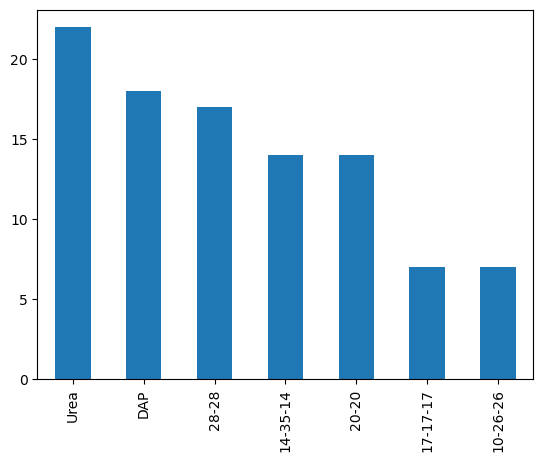

In [8]:
df['Fertilizer Name'].value_counts().plot.bar()

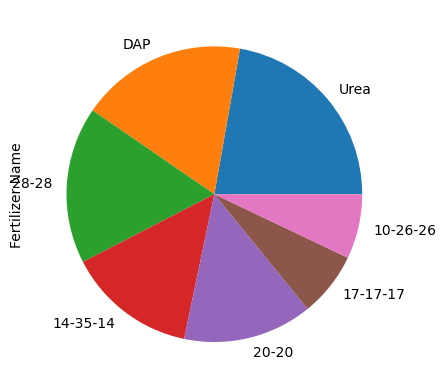

In [9]:
df['Fertilizer Name'].value_counts(normalize=True).plot.pie()
plt.show()

In [10]:
df['Soil Type'].value_counts()

Loamy     21
Sandy     20
Clayey    20
Black     19
Red       19
Name: Soil Type, dtype: int64

<Axes: >

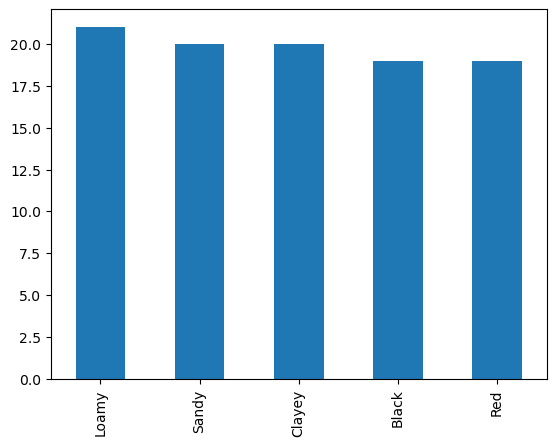

In [11]:
df['Soil Type'].value_counts().plot.bar()

In [12]:
df['Crop Type'].value_counts()

Sugarcane      13
Cotton         12
Millets        11
Paddy          10
Pulses         10
Wheat           9
Tobacco         7
Barley          7
Oil seeds       7
Ground Nuts     7
Maize           6
Name: Crop Type, dtype: int64

<Axes: >

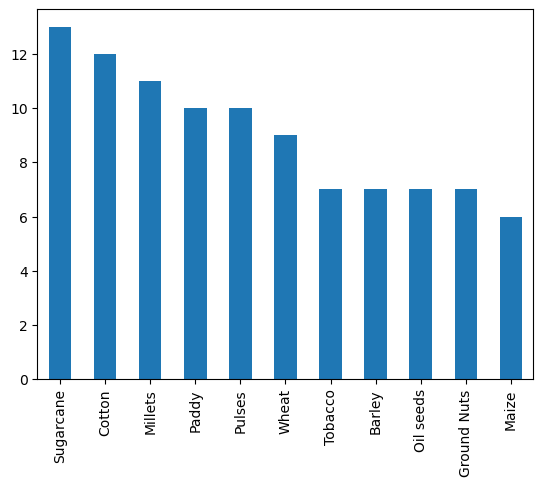

In [13]:
df['Crop Type'].value_counts().plot.bar()

In [14]:
y= df['Fertilizer Name'].copy()
X= df.drop('Fertilizer Name',axis=1)

In [15]:
df.drop(columns=['Soil Type','Crop Type'],inplace=True)

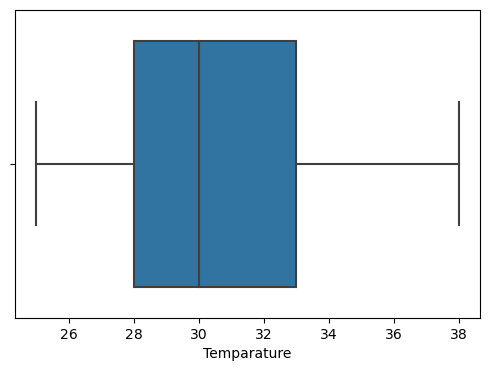

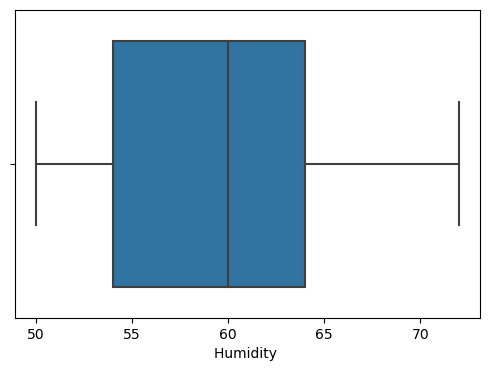

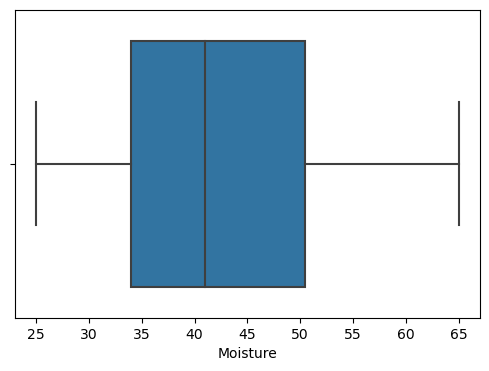

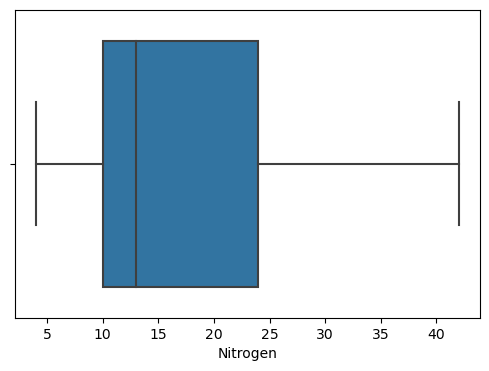

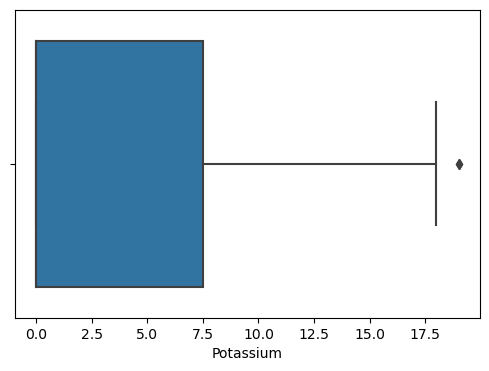

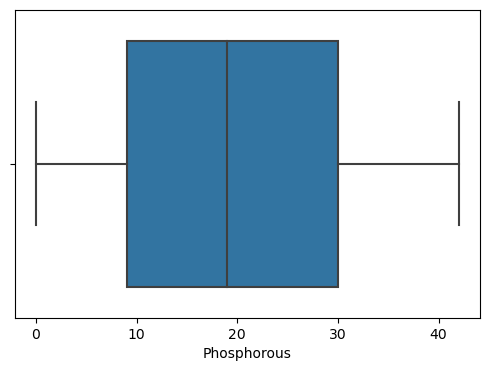

In [16]:
for column in df.columns[0:-1]:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=(column),data=df)

In [17]:
for column in df.columns[0:-1]:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    IQR = q3 - q1
    lower_limit = q1 - 1.5*IQR
    upper_limit = q3 + 1.5*IQR
    df[column]=np.where(df[column]<=lower_limit,lower_limit,df[column])
    df[column]=np.where(df[column]>=upper_limit,upper_limit,df[column])

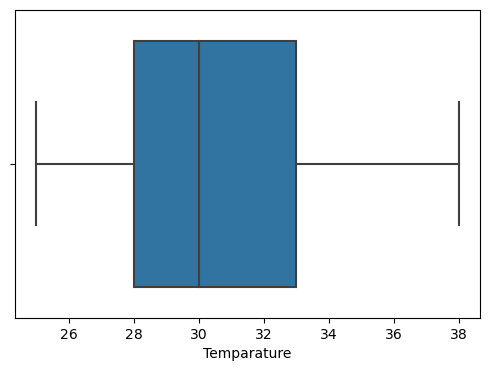

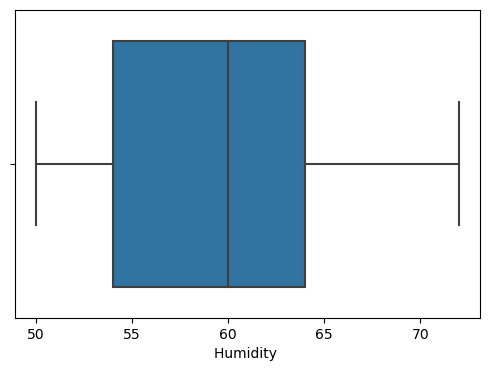

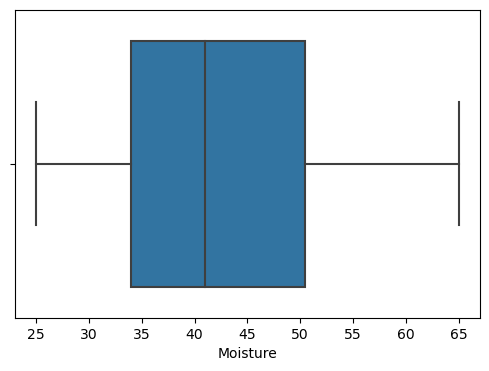

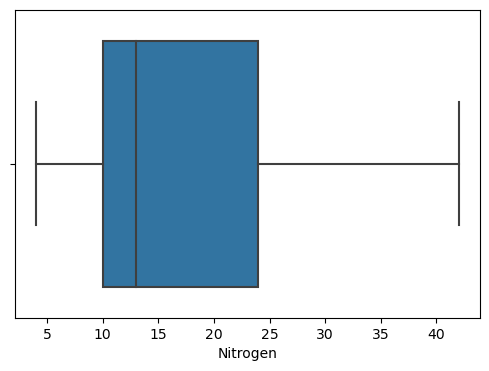

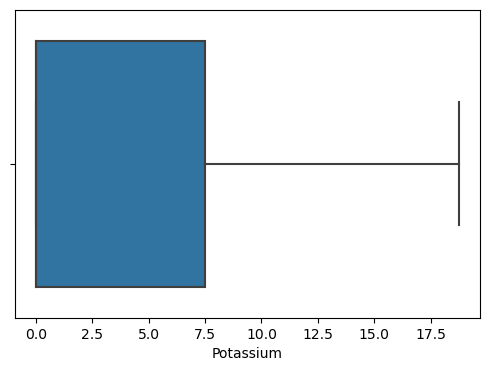

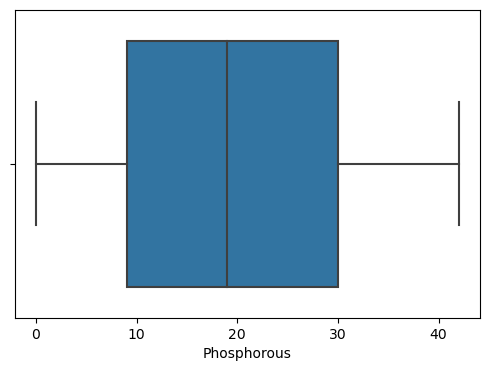

In [18]:
for column in df.columns[0:-1]:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=(column),data=df)

In [19]:
X[['Soil Type', 'Crop Type']].nunique()

Soil Type     5
Crop Type    11
dtype: int64

In [20]:
dumm=pd.get_dummies(X[['Soil Type', 'Crop Type']])
dumm

,Soil Type_Black,Soil Type_Clayey,Soil Type_Loamy,Soil Type_Red,Soil Type_Sandy,Crop Type_Barley,Crop Type_Cotton,Crop Type_Ground Nuts,Crop Type_Maize,Crop Type_Millets,Crop Type_Oil seeds,Crop Type_Paddy,Crop Type_Pulses,Crop Type_Sugarcane,Crop Type_Tobacco,Crop Type_Wheat
0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
95,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
96,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
97,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0


In [21]:
df=df.join(dumm)

In [22]:
df.head()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,Fertilizer Name,Soil Type_Black,Soil Type_Clayey,Soil Type_Loamy,...,Crop Type_Cotton,Crop Type_Ground Nuts,Crop Type_Maize,Crop Type_Millets,Crop Type_Oil seeds,Crop Type_Paddy,Crop Type_Pulses,Crop Type_Sugarcane,Crop Type_Tobacco,Crop Type_Wheat
0,26.0,52.0,38.0,37.0,0.0,0.0,Urea,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,29.0,52.0,45.0,12.0,0.0,36.0,DAP,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,34.0,65.0,62.0,7.0,9.0,30.0,14-35-14,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,32.0,62.0,34.0,22.0,0.0,20.0,28-28,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28.0,54.0,46.0,35.0,0.0,0.0,Urea,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [23]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df['Fertilizer Name'])

LabelEncoder()

In [24]:
le.classes_

array(['10-26-26', '14-35-14', '17-17-17', '20-20', '28-28', 'DAP',
       'Urea'], dtype=object)

In [25]:
df['Fertilizer Name'] = le.transform(df['Fertilizer Name'])

<Axes: >

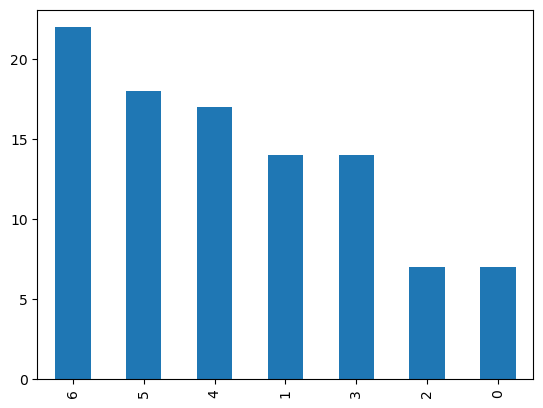

In [26]:
df['Fertilizer Name'].value_counts().plot.bar()

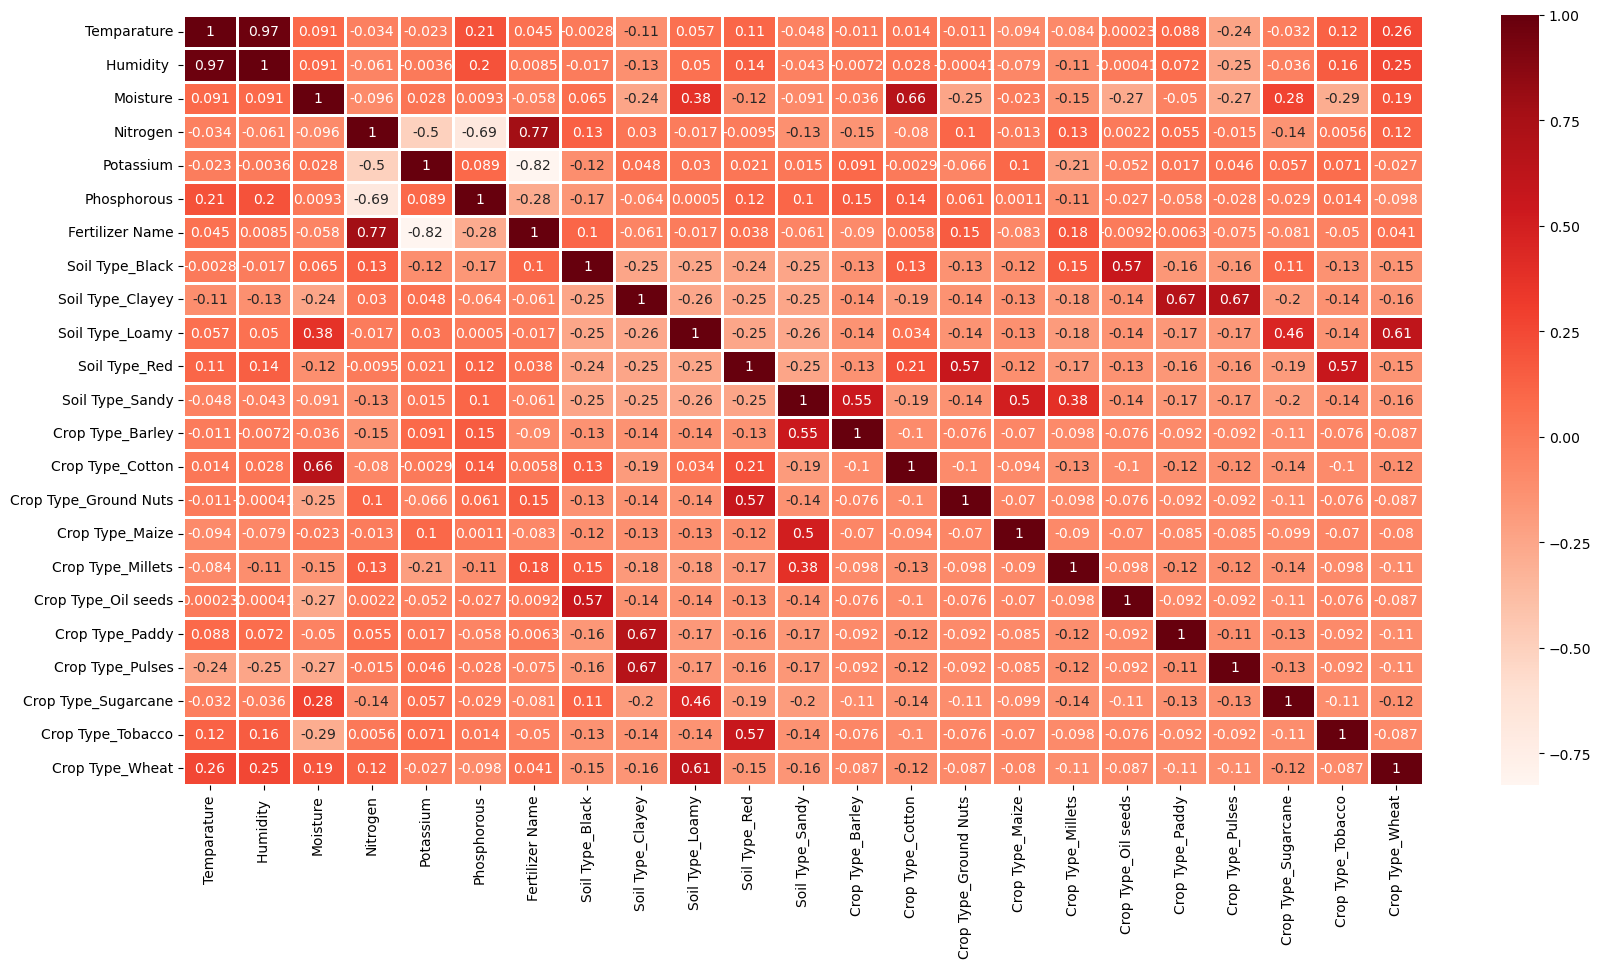

In [27]:
corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True,linewidth=1, cmap='Reds')
plt.show()

In [28]:
y= df['Fertilizer Name'].copy()
X= df.drop('Fertilizer Name',axis=1)

In [29]:
y
type(y)

pandas.core.series.Series

In [30]:
X
type(X)

pandas.core.frame.DataFrame

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [32]:
X_train

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,Soil Type_Black,Soil Type_Clayey,Soil Type_Loamy,Soil Type_Red,...,Crop Type_Cotton,Crop Type_Ground Nuts,Crop Type_Maize,Crop Type_Millets,Crop Type_Oil seeds,Crop Type_Paddy,Crop Type_Pulses,Crop Type_Sugarcane,Crop Type_Tobacco,Crop Type_Wheat
49,33.0,64.0,51.0,5.0,9.00,29.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
70,26.0,52.0,39.0,21.0,0.00,23.0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
68,25.0,50.0,40.0,6.0,18.75,16.0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
15,31.0,62.0,49.0,10.0,13.00,14.0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
39,29.0,58.0,34.0,15.0,0.00,37.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,28.0,54.0,41.0,36.0,0.00,0.0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
71,31.0,62.0,32.0,39.0,0.00,0.0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
14,26.0,52.0,31.0,14.0,0.00,41.0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
92,36.0,68.0,41.0,41.0,0.00,0.0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0


In [33]:
X_test

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,Soil Type_Black,Soil Type_Clayey,Soil Type_Loamy,Soil Type_Red,...,Crop Type_Cotton,Crop Type_Ground Nuts,Crop Type_Maize,Crop Type_Millets,Crop Type_Oil seeds,Crop Type_Paddy,Crop Type_Pulses,Crop Type_Sugarcane,Crop Type_Tobacco,Crop Type_Wheat
62,34.0,65.0,64.0,24.0,0.0,20.0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
40,27.0,54.0,30.0,13.0,0.0,13.0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
95,30.0,60.0,27.0,4.0,17.0,17.0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
18,28.0,54.0,65.0,39.0,0.0,0.0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
97,36.0,60.0,43.0,15.0,0.0,41.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
84,31.0,62.0,44.0,21.0,0.0,28.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
64,27.0,53.0,35.0,37.0,0.0,0.0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
42,32.0,62.0,34.0,22.0,0.0,24.0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
10,27.0,54.0,28.0,13.0,0.0,40.0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
0,26.0,52.0,38.0,37.0,0.0,0.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [34]:
y_train

49    1
70    4
68    0
15    2
39    5
     ..
60    6
71    6
14    5
92    6
51    3
Name: Fertilizer Name, Length: 79, dtype: int32

In [35]:
y_test

62    4
40    3
95    0
18    6
97    5
84    4
64    6
42    4
10    5
0     6
31    5
76    4
47    4
26    1
44    5
4     6
22    5
12    6
88    0
73    6
Name: Fertilizer Name, dtype: int32

In [36]:
print('X_train shape:',X_train.shape)
print('y_train shape:',y_train.shape)
print('X_test shape:',X_test.shape)
print('y_test shape:',y_test.shape)

X_train shape: (79, 22)
y_train shape: (79,)
X_test shape: (20, 22)
y_test shape: (20,)


In [37]:
## model 1       part1
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression(max_iter=1000)
model1.fit(X_train, y_train)

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [38]:
y_pred = model1.predict(X_test)
y_pred

array([4, 3, 0, 6, 5, 4, 6, 4, 5, 6, 5, 4, 4, 1, 5, 6, 5, 6, 0, 6])

In [39]:
len(y_pred)

20

In [40]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [41]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [42]:
print('X_train_scaled shape:',X_train_scaled.shape)
print('X_test_scaled shape:',X_test_scaled.shape)

X_train_scaled shape: (79, 22)
X_test_scaled shape: (20, 22)


In [43]:
## model 1   part2
from sklearn.linear_model import LogisticRegression
model11 = LogisticRegression()
model11.fit(X_train_scaled, y_train)

LogisticRegression()

In [44]:
y_pred = model11.predict(X_test_scaled)
y_pred

array([5, 4, 0, 6, 5, 5, 6, 4, 4, 6, 5, 4, 4, 5, 5, 6, 5, 6, 1, 6])

In [45]:
len(y_pred)

20

In [46]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7


In [47]:
# Model 2 ( KNN )

In [48]:
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier(n_neighbors=1)
model2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [49]:
y_pred = model2.predict(X_test)
print(len(y_pred))

20


In [50]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy for KNN model:", accuracy)

Accuracy for KNN model: 1.0


In [51]:
# Elbow Method

In [52]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import os

In [53]:
# Set OMP_NUM_THREADS environment variable to 1
os.environ['OMP_NUM_THREADS'] = '1'

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k, n_init=10).fit(X)
    kmeanModel.fit(X)

    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)

    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

In [54]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 21.607657633134604
2 : 16.760758906608597
3 : 14.686474099098602
4 : 12.951609656878833
5 : 11.90676406900916
6 : 11.068516036990738
7 : 10.159353041021438
8 : 9.603109278224085
9 : 9.254946262730279


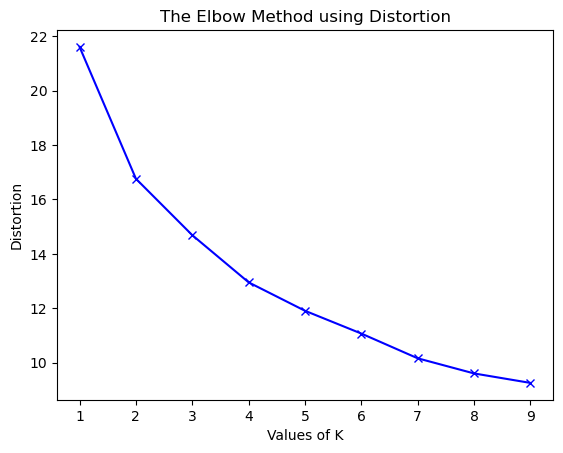

In [55]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [56]:
for key, val in mapping2.items():
    print(f'{key} : {val}')

1 : 51447.88005050506
2 : 30578.108766233767
3 : 23064.538468228202
4 : 18302.33968632108
5 : 15591.09992857075
6 : 13510.31993657787
7 : 11428.052517110082
8 : 10251.454438105753
9 : 9464.990575396825


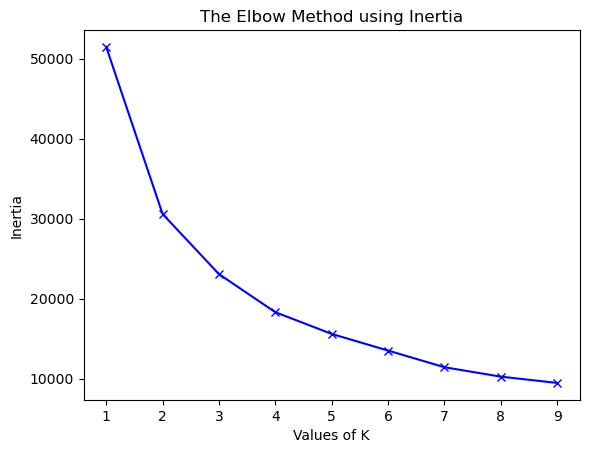

In [57]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [58]:
import pickle

In [59]:
pickle.dump(model1,open('21BAI1483_Sarvesh_Logistic_model1.pkl','wb'))

In [60]:
pickle.dump(model2,open('21BAI1483_Sarvesh_KNN_model1.pkl','wb'))

In [61]:
Model_log = pickle.load(open('21BAI1483_Sarvesh_Logistic_model1.pkl','rb'))

In [62]:
Model_log

LogisticRegression(max_iter=1000)

In [63]:
Model_log.predict(X_test)

array([4, 3, 0, 6, 5, 4, 6, 4, 5, 6, 5, 4, 4, 1, 5, 6, 5, 6, 0, 6])

In [64]:
Model_KNN = pickle.load(open('21BAI1483_Sarvesh_KNN_model1.pkl','rb'))

In [65]:
Model_KNN

KNeighborsClassifier(n_neighbors=1)

In [66]:
Model_KNN.predict(X_test)

array([4, 3, 0, 6, 5, 4, 6, 4, 5, 6, 5, 4, 4, 1, 5, 6, 5, 6, 0, 6])